In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import hdbscan
import umap
from sentence_transformers import SentenceTransformer

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('omw-1.4')  # Open Multilingual Wordnet

# Load CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Feature Extraction using TF-IDF
def tfidf_vectorize(texts):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(texts)
    return vectors, vectorizer

# Clustering using K-Means
def kmeans_clustering(vectors, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(vectors)
    return labels

# Clustering using HDBSCAN
def hdbscan_clustering(embeddings):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
    labels = clusterer.fit_predict(embeddings)
    return labels

# Dimensionality Reduction with UMAP
def reduce_dimensionality(embeddings):
    reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_embeddings = reducer.fit_transform(embeddings)
    return reduced_embeddings

# Visualizing Clusters
def plot_clusters(embeddings, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.show()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Ravi.chinni\AppData\Roaming\nltk_data...
[nltk_data

In [16]:

# Main Workflow
def main(file_path):
    df = load_data(file_path)
    df['Processed_Text'] = df['Summary'].fillna('') + ' ' + df['Description'].fillna('')
    df['Processed_Text'] = df['Processed_Text'].apply(preprocess_text)
    
    # TF-IDF Approach
    tfidf_vectors, vectorizer = tfidf_vectorize(df['Processed_Text'])
    df['KMeans_Cluster'] = kmeans_clustering(tfidf_vectors, n_clusters=10)
    
    # Embedding Approach
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(df['Processed_Text'], show_progress_bar=True)
    df['HDBSCAN_Cluster'] = hdbscan_clustering(embeddings)
    
    # Reduce Dimensions for Visualization
    reduced_embeddings = reduce_dimensionality(embeddings)
    
    # Plot Clusters
    plot_clusters(reduced_embeddings, df['HDBSCAN_Cluster'], 'HDBSCAN Clusters')
    
    return df




Batches:   0%|          | 0/3 [00:00<?, ?it/s]

d:\Git-RaviChinni\Support-tickets-clustering-classification\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Git-RaviChinni\Support-tickets-clustering-classification\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Git-RaviChinni\Support-tickets-clustering-classification\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Git-RaviChinni\Support-tickets-clustering-classification\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


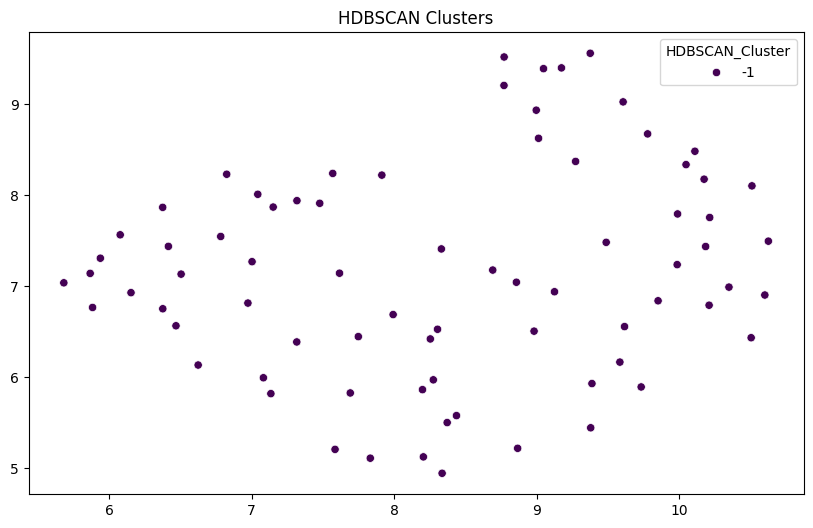

In [14]:
# Run the script
file_path = '.data\\tickets.csv'  # Replace with your actual CSV file
clustered_df = main(file_path)
clustered_df.to_csv('.output\\clustered_tickets.csv', index=False)